# PCA Plots

## General settings and loading files

In [1]:
%%time

% matplotlib inline
% load_ext autoreload
% autoreload 2

% run general_settings.py
# ^ Takes ~20s to run if it finds the dumpfiles
# ^ WARNING: It will hog ~2.02 Gb RAM


[10:47:39] 'panels' dict
[10:47:39] 'galanter', 'present', 'missing' dataframes
[10:47:39] 'panel_labels'
[10:47:39] 'panel_names' dict
[10:47:39] 'panel_rsIDs' dict
[10:47:39] 'genome' dataframe
[10:47:45] 'lat' dataframe
[10:48:02] 'control_genotypes' huge datagrame
[10:48:02] 'control_rsIDs' dict to filter it ^
[10:48:02] 'cp_factors' list
[10:48:02] 'control_names' dict
[10:48:02] 'df_1000G_samples'
[10:48:02] 'df_1000G_SNPs'
[10:48:02] 'df_1000G_genotypes'
[10:48:02] 'df_1000G_populations'
[10:48:02] 'df_1000G_genotypes_alleles'

/home/juan/repos/tesina/settings/genome.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  centromers["chromosome"] = [i.replace("CEN", "") for i in centromers.index]
/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1572: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())



[10:48:02] 'mafs' dataframe
CPU times: user 19.2 s, sys: 4.02 s, total: 23.2 s
Wall time: 24.3 s


/home/juan/anaconda3/lib/python3.5/site-packages/pandas/io/parsers.py:1574: FutureWarning: split() requires a non-empty pattern match.
  yield pat.split(line.strip())


## Create the datasets
Lists of sample IDs of chosen populations to later filter 1000 Genomes data.

In [2]:
% run datasets_settings.py

! echo; wc -l /home/juan/tesina/dataset_dumps/*.samples

[10:48:03] 'dataset_names'
[10:48:03] 'dataset_populations'
[10:48:03] 'dataset_samples' created and written to files

  346 /home/juan/tesina/dataset_dumps/L.samples
  544 /home/juan/tesina/dataset_dumps/LE.samples
  751 /home/juan/tesina/dataset_dumps/LEA.samples
  959 /home/juan/tesina/dataset_dumps/LEAC.samples
 1062 /home/juan/tesina/dataset_dumps/LEACI.samples
 3662 total


In [11]:
df_1000G_samples.loc[dataset_samples["LE"]].population.unique()

array(['GBR', 'PUR', 'CLM', 'IBS', 'PEL', 'MXL'], dtype=object)

In [16]:
dataset_creator.dataset_definitions("populations")

{'L': ['MXL', 'PEL', 'CLM', 'PUR'],
 'LE': ['MXL', 'CLM', 'PUR', 'GBR', 'PEL', 'IBS'],
 'LEA': ['PEL', 'GBR', 'PUR', 'MXL', 'YRI', 'LWK', 'CLM', 'IBS'],
 'LEAC': ['CHB',
  'CHS',
  'PEL',
  'GBR',
  'PUR',
  'MXL',
  'YRI',
  'LWK',
  'CLM',
  'IBS'],
 'LEACI': ['CHB',
  'CHS',
  'PEL',
  'GIH',
  'GBR',
  'PUR',
  'MXL',
  'YRI',
  'LWK',
  'CLM',
  'IBS']}

## PCA plots

# ENCONTRAR por qué la lista de samples no incluye a los IBS de modo que están las labels de población desfasadas!!!!

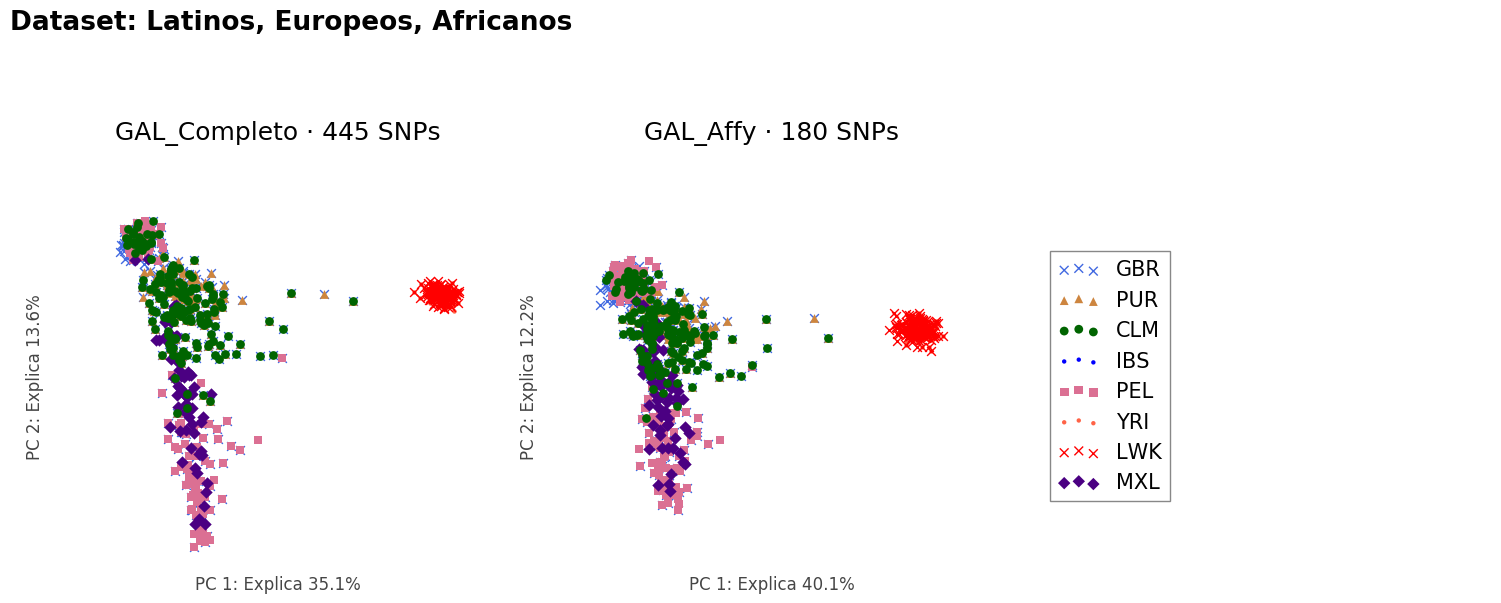

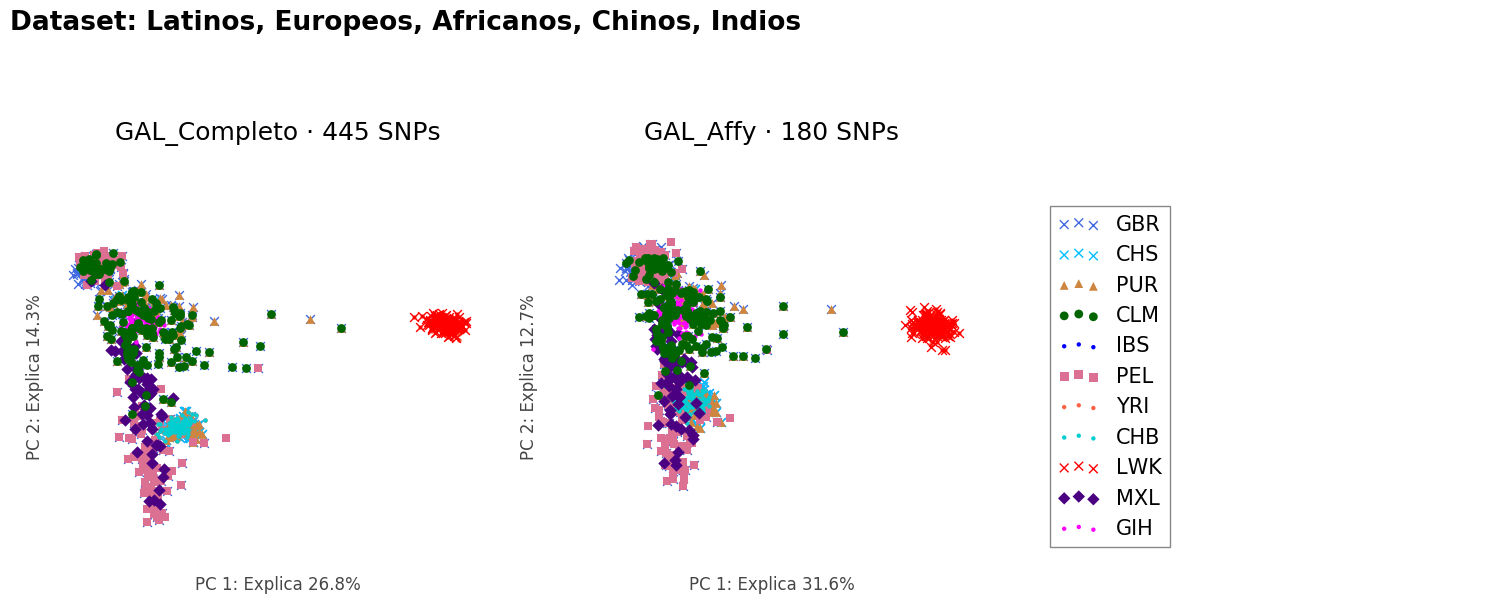

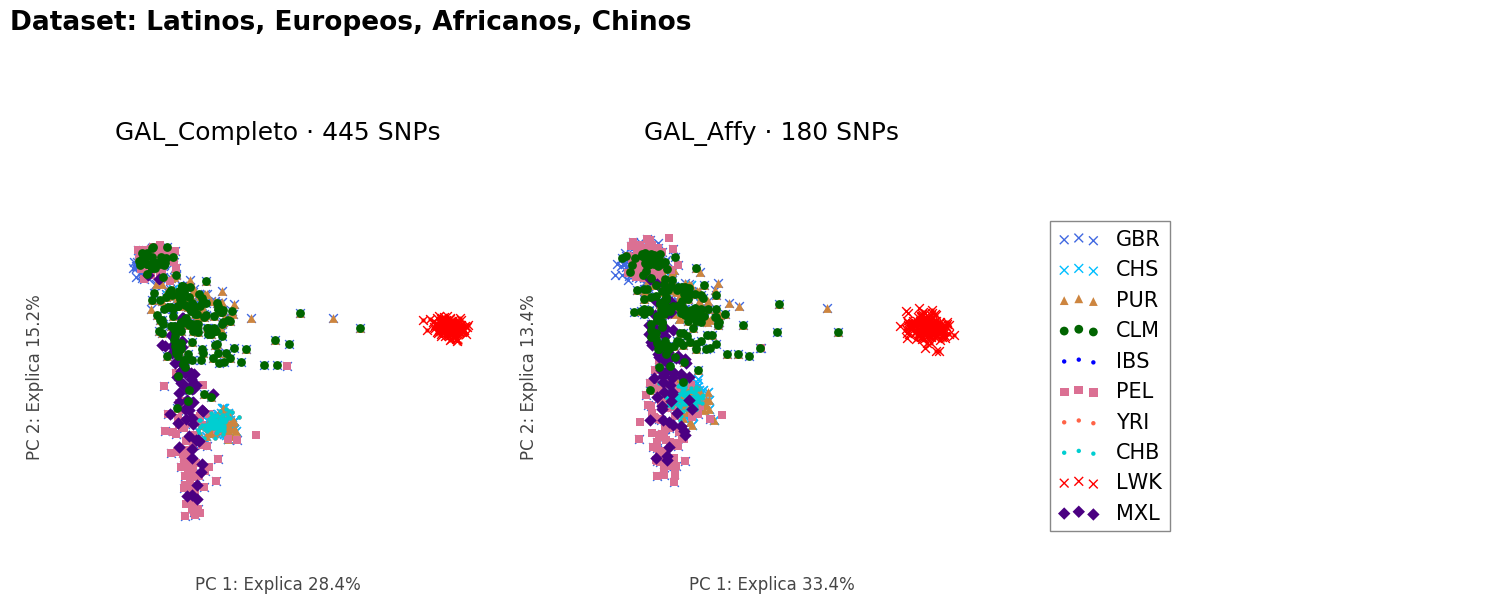

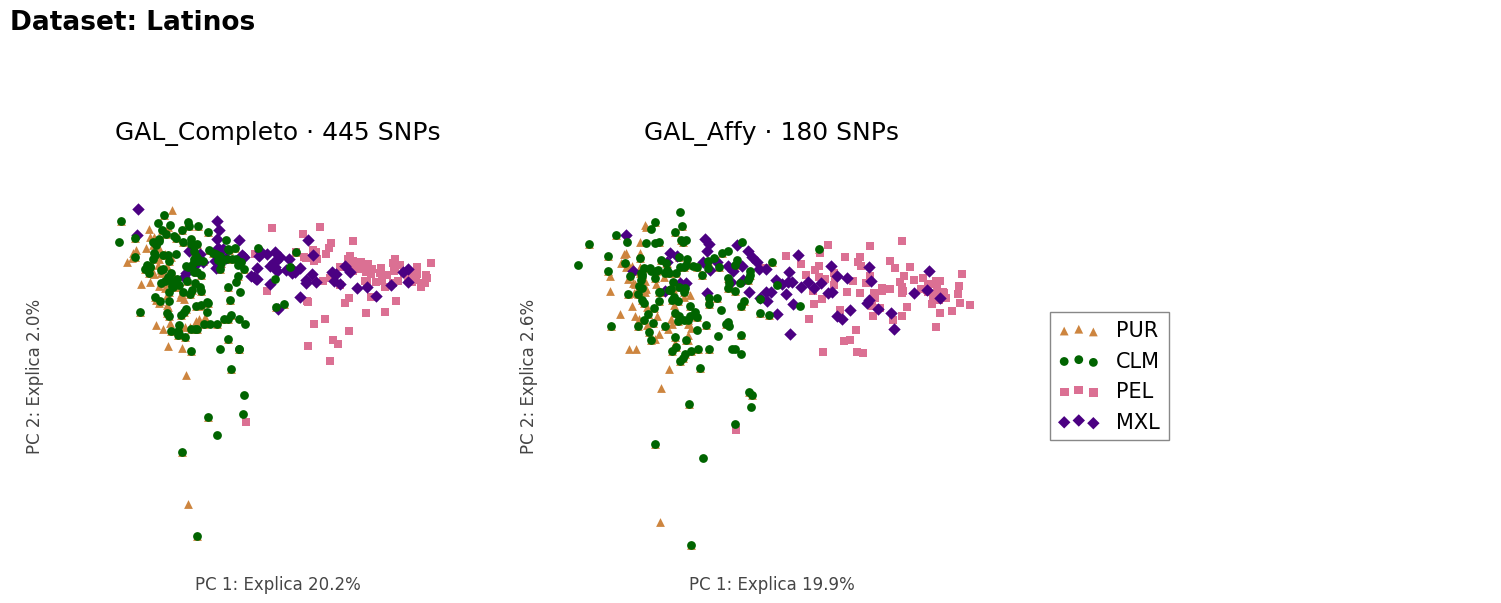

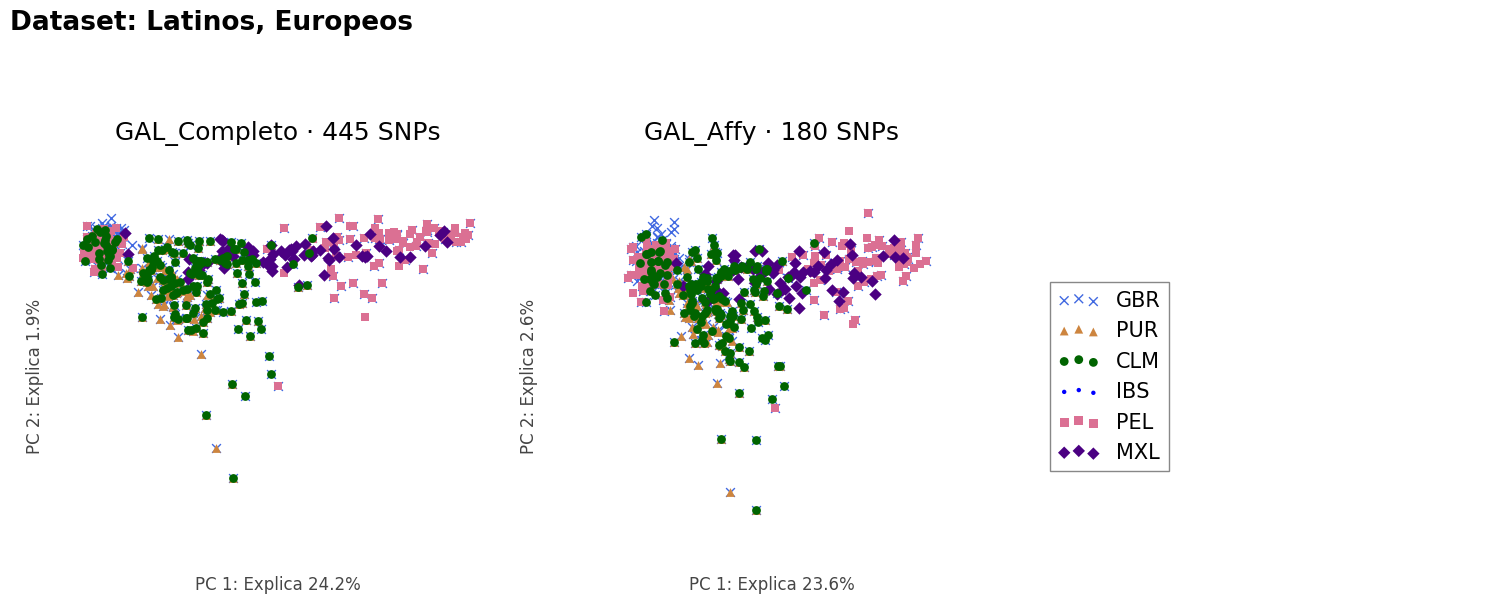

CPU times: user 8.86 s, sys: 11.1 s, total: 20 s
Wall time: 8.08 s


In [3]:
%%time

# == WARNING ==
# This cell will take ~4m to execute
# And it will take ~500 Mb RAM, I think

from plotters.pca import PCAPlotter

pca_plotter = PCAPlotter()
components_to_compare = [(0, 1)]

def make_filename(dataset_label, panel_labels, components_to_compare):
    return "{}_{}_{}".format(dataset_label, "_".join(panel_labels).lower(),
                             len(components_to_compare) * 2)

for dataset_label, sample_ids in dataset_samples.items():
    fig_title = "Dataset: {}".format(dataset_names[dataset_label])
    
    # GAL Panles
    dataset_genotypes = df_1000G_genotypes.loc[sample_ids, :]
    filename = make_filename(dataset_label, panel_labels, components_to_compare)
    pca_plotter.plot(fig_title, panel_rsIDs, dataset_genotypes, df_1000G_samples,
                     components_to_compare, panel_names, filename)
    
#     # Control Panels
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     filename = make_filename(dataset_label, control_labels, components_to_compare)
#     pca_plotter.plot(fig_title, control_rsIDs, dataset_genotypes, df_1000G_samples,
#                      components_to_compare, control_names, filename)
    
#     # Control Panels - Extra components
#     only_big_cp = {"100": control_rsIDs["100"]}
#     more_components_to_compare = [(2, 3), (4, 5), (6, 7)]
#     dataset_genotypes = control_genotypes.loc[sample_ids, :]
#     filename = make_filename(dataset_label, ["100"], more_components_to_compare)
#     pca_plotter.plot(fig_title, only_big_cp, dataset_genotypes, df_1000G_samples,
#                      more_components_to_compare, control_names, filename)